In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The Heisenberg Hamiltonian

## Section A
Let's start with generating the spin operators for a particle with spin 1/2

$S_x = \frac{\hbar}{2} \sigma_x$ and same for y and z. $\sigma_i$ are the pauli matrices

In [2]:
S_x = np.matrix([[0, 1], [1, 0]], dtype=complex) / 2
S_y = np.matrix([[0, -1j], [1j, 0]]) / 2
S_z = np.matrix([[1, 0], [0, -1]], dtype=complex) / 2

S = [S_x, S_y, S_z]

for i in range(len(S)):
    print(S[i], "\n")

[[0. +0.j 0.5+0.j]
 [0.5+0.j 0. +0.j]] 

[[ 0.+0.j  -0.-0.5j]
 [ 0.+0.5j  0.+0.j ]] 

[[ 0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j]] 



## Section B
Now consider a system of two particles. Let's create the spin operators for these two:

$S_x^{(1)}, S_x^{(2)}$ and same for y and z.

We have: $S_x^{(1)} = S_x \otimes I$ and so one.

If you google "*numpy tensor product*" you come upon the method `np.kron()`

In [3]:
S_two_particle = []    # make a list of the two particle spin operators

for i in range(len(S)):    # fill in the list in order of x, y, z
    S_two_particle.append(np.kron(S[i], np.eye(2)))    # first fill in S_i for particle 1
    S_two_particle.append(np.kron(np.eye(2), S[i]))    # then for particle 2

for S_two in S_two_particle:
    print(S_two, "\n")

[[0. +0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0. +0.j]] 

[[0. +0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0.5+0.j 0. +0.j]] 

[[0.+0.j  0.+0.j  0.-0.5j 0.-0.j ]
 [0.+0.j  0.+0.j  0.-0.j  0.-0.5j]
 [0.+0.5j 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.5j 0.+0.j  0.+0.j ]] 

[[0.+0.j  0.-0.5j 0.+0.j  0.-0.j ]
 [0.+0.5j 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.-0.j  0.+0.j  0.-0.5j]
 [0.+0.j  0.+0.j  0.+0.5j 0.+0.j ]] 

[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -0.5+0.j -0. +0.j]
 [ 0. +0.j  0. +0.j -0. +0.j -0.5+0.j]] 

[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j  0. +0.j -0. +0.j]
 [ 0. +0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -0. +0.j  0. +0.j -0.5+0.j]] 



## Section C
Now let's create the spin operators of the system, namingly: $S_x^{(1)}S_x^{(2)}$ and for y, z.

In [4]:
S_system = []    # create a list for the spin operators. there's going to be three of them.

for i in range(0, len(S_two_particle), 2):    #i = (0, 2, 4)
    # S_x_12 = S_x_1 * S_x_2 and so on
    S_system.append(S_two_particle[i] * S_two_particle[i+1])

for item in S_system:
    print(item, "\n")

[[0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j]
 [0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j]
 [0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j]] 

[[ 0.  +0.j  0.  +0.j  0.  +0.j -0.25+0.j]
 [ 0.  +0.j  0.  +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.  +0.j  0.  +0.j]
 [-0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j]] 

[[ 0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.25+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.25+0.j]] 



Now let's create the two particle spin operators directly and compare them with
the results from the method we used above.

$S_x^{(1)}S_x^{(2)} = S_x \otimes S_x$ and so on.

In [5]:
for i, item in enumerate(S):    # using the matrices in section A
    print(S_system[i] == np.kron(item, item))    # compare the operators

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


## Section D
Now consider the heisenberg interaction of two site with one particle in each one. Let's find
eigen values and eigen states of this hamiltonian for $J = 1$

$H = J(S_x^{(1)}S_x^{(2)} + S_y^{(1)}S_y^{(2)} + S_z^{(1)}S_z^{(2)})$

In [6]:
# generating the hamiltonian
H = 0
for item in S_system:
    H += item

H

matrix([[ 0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
        [ 0.  +0.j, -0.25+0.j,  0.5 +0.j,  0.  +0.j],
        [ 0.  +0.j,  0.5 +0.j, -0.25+0.j,  0.  +0.j],
        [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.25+0.j]])

In [7]:
# diagonalizing the hamiltonian
vals, vecs = np.linalg.eigh(H)

print("eigen valuse are: ", vals)

for i in range(len(vecs)):
    print(f"the {i}th eigen state is:\n", vecs[:, i], "\n")

eigen valuse are:  [-0.75  0.25  0.25  0.25]
the 0th eigen state is:
 [[ 0.        +0.j]
 [ 0.70710678+0.j]
 [-0.70710678+0.j]
 [ 0.        +0.j]] 

the 1th eigen state is:
 [[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] 

the 2th eigen state is:
 [[0.        +0.j]
 [0.70710678+0.j]
 [0.70710678+0.j]
 [0.        +0.j]] 

the 3th eigen state is:
 [[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]] 



noting that $\frac{1}{\sqrt{2}} = 0.7071$ we see the results match the theory.

## Section E
Now consider 10 particles placed in 10 sites in a row. Using the tensor product `np.kron` let's
make the single particle spin operators $S_x^{(i)}$ and y, z for $i = 1, 2, ..., 10$

In [8]:
def generate_spin(i):
    """ generate the three spins x, y, z for the {i}th particle, i= 1, 2, ..., 10"""
    S_list= []    # make a list of them.
    for item in S:
        S_list.append(np.kron(np.eye(2 ** i), np.kron(item, np.eye(2 ** (9 - i)))))
    
    return S_list[:]

In [9]:
S_single_part = []    # make a list of single particle spins in order of x,y,z and 0, 1, ..., 9

for i in range(0, 10):
    item_x, item_y, item_z = generate_spin(i)
    S_single_part.append(item_x)
    S_single_part.append(item_y)
    S_single_part.append(item_z)

## Section F
Now let's create the Heisenberg hamiltonian for this system with $J = 1$

$H = \sum_{i=1}^{9} S_x^{(i)} S_x^{(i+1)} + S_y^{(i)} S_y^{(i+1)} + S_z^{(i)} S_z^{(i+1)}$

In [10]:
# generating the hamiltonian
H = 0
for i in range(3):    # order of x, y, z
    for j in range(9):    # order of {i} = {0, 1, ..., 8}
        H += S_single_part[i + 3*j] * S_single_part[i + 3 * (j+1)]

## Section G
Let's find the ground state and its energy

In [11]:
vals, vecs = np.linalg.eigh(H)     # diagonalizing the hamiltonian with sorted eigen values

print("The ground energy is: ", vals[0])

ground = vecs[:, 0]
print("The ground state is \n", ground)


The ground energy is:  -4.258035207282884
The ground state is 
 [[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 ...
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


## Section H
Let's find the expectation values of $S_x^{(i)}$ and y, z for i from 1 to 10 and 
$S_x^{(i)} S_x^{(i+1)}$ and y, z for i from 1 to 9

In [59]:
expect_single_part_x = []    # create a list for expectation values of x and i

for i in range(10):
    expect_single_part_x.append(ground.H * S_single_part[3 * i] * ground)
print(expect_single_part_x)


expect_single_part_y = []    # create a list for expectation values of y and i

for i in range(10):
    expect_single_part_y.append(ground.H * S_single_part[3*i + 1] * ground)
print(expect_single_part_y)


expect_single_part_z = []    # create a list for expectation values of z and i

for i in range(10):
    expect_single_part_z.append(ground.H * S_single_part[3*i + 2] * ground)
print(expect_single_part_z)
                                

[matrix([[2.62066912e-16+0.j]]), matrix([[-2.57817818e-16+0.j]]), matrix([[2.20797711e-17+0.j]]), matrix([[-1.34756867e-16+0.j]]), matrix([[-6.39991432e-17+0.j]]), matrix([[6.18376913e-17+0.j]]), matrix([[8.66238657e-17+0.j]]), matrix([[2.40836399e-17+0.j]]), matrix([[1.80042919e-16+0.j]]), matrix([[-1.8016097e-16+0.j]])]
[matrix([[0.-3.52410621e-32j]]), matrix([[0.+2.7336838e-32j]]), matrix([[0.-1.34844669e-32j]]), matrix([[0.+7.8817928e-33j]]), matrix([[0.-2.6446308e-33j]]), matrix([[0.+6.26874128e-33j]]), matrix([[0.+8.59414242e-33j]]), matrix([[0.-5.20445422e-33j]]), matrix([[0.-1.28485977e-33j]]), matrix([[0.+0.j]])]
[matrix([[-3.85380386e-16+0.j]]), matrix([[2.63406194e-16+0.j]]), matrix([[-3.275382e-16+0.j]]), matrix([[3.54680956e-16+0.j]]), matrix([[-2.56768661e-16+0.j]]), matrix([[3.1267457e-16+0.j]]), matrix([[-2.64779632e-16+0.j]]), matrix([[2.67134147e-16+0.j]]), matrix([[-3.02043327e-16+0.j]]), matrix([[3.64001619e-16+0.j]])]


## Section I
Now let's find the expectation value of the following operator:

$\vec{S}^{(1)}.\vec{S}^{(i)} = S_x^{(1)}S_x^{(i)} + S_y^{(1)}S_y^{(i)} + S_z^{(1)}S_z^{(i)}$

This expectation value is called the spin-spin correlation value.

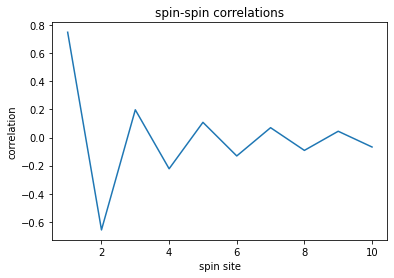

In [18]:
ss_cor = []    # create a list of the operators

for i in range(10):    # fill in the list
    ss_cor.append(S_single_part[0] * S_single_part[3*i] +
                  S_single_part[1] * S_single_part[3*i + 1] +
                  S_single_part[2] * S_single_part[3*i + 2])

exp_vals = np.zeros(10)    # create an array of floats for the expectation values
for i in range(10):
    exp_vals[i] = np.real(ground.H * ss_cor[i] * ground)[0, 0]     # calculate the expectation value for the ground state

    
plt.plot(np.linspace(1, 10, 10), exp_vals)
plt.title("spin-spin correlations")
plt.xlabel("spin site")
plt.ylabel("correlation")
plt.show()

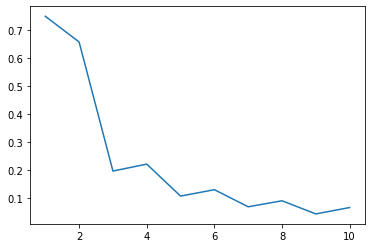

In [20]:
plt.plot(np.linspace(1, 10, 10), np.absolute(exp_vals))    # plot the abs. of exp_vals
plt.show()

As we can see, the absolute value of the spin-spin correlation value drops drastically as we move away
from site 1.